# <span style="color:red"> E-Commerce Sales Analysis</span> 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns



In [3]:
df= pd.read_csv('E-Commerce Sales.csv', encoding='unicode_escape')

In [4]:
df.shape


(11251, 15)

In [5]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [6]:
data=df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
df['Marital_Status_Label'] = df['Marital_Status'].replace({0: 'Married', 1: 'Unmarried'})


In [10]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Marital_Status_Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Marital_Status_Label
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,Married
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,Unmarried
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,Unmarried
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,Married
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,Unmarried
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,Unmarried
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,Unmarried
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,Married
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,Married
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,Unmarried


In [12]:
df.rename(columns={'Marital_Status_Label': 'Marital'},inplace=True)

In [13]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
Marital              0
dtype: int64

In [14]:
df.shape

(11251, 14)

In [15]:
df.dropna(inplace=True)
#drop null value

In [16]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
Marital             0
dtype: int64

In [17]:
df.shape


(11239, 14)

In [18]:
a,b = 11251,11239
print(b-a)

-12


exaple to under stand the (inplace = True)

In [19]:
data_test = [['madhav', 11],['Gopi',15],['keshav',],['lalite', 16]]

df_test = pd.DataFrame(data_test,columns=['name','Age'])
df_test

,name,Age
0,madhav,11.0
1,Gopi,15.0
2,keshav,NaN
3,lalite,16.0


In [20]:
df_test.dropna(inplace=True)

In [21]:
df_test

,name,Age
0,madhav,11.0
1,Gopi,15.0
3,lalite,16.0


In [22]:
# change data type
df['Amount']=df['Amount'].astype(int)

In [23]:
df['Amount'].dtypes

dtype('int64')

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Marital'],
      dtype='object')

In [25]:
# rename change the name of the column State -> States
df.rename(columns={'State': 'States'},inplace=True)

In [26]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [27]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


<h2 style="color:pink;">Exploratory Data Analysis</h2>


<h4>Gender</h4>

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'States', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Marital'],
      dtype='object')

Text(0.5, 1.0, 'Gender Distribution')

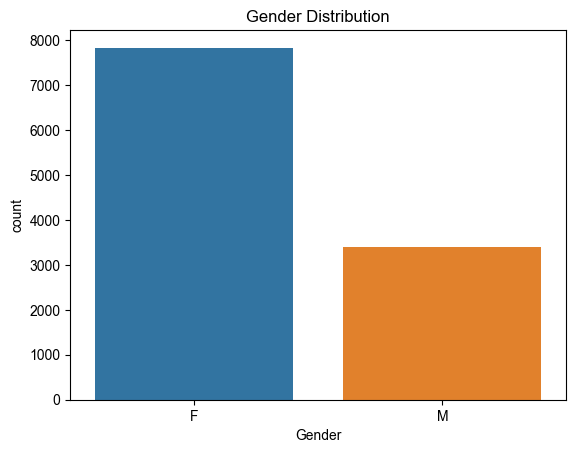

In [29]:
ax = sns.countplot(x='Gender', hue='Gender', data=df)#,palette={'M': 'red', 'F': 'blue'}, legend=False)
sns.set(rc={'figure.figsize':(4,5)})
plt.title('Gender Distribution')

Text(0.5, 1.0, 'No. Male & Female')

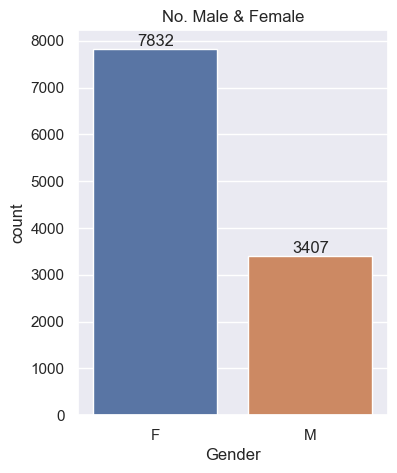

In [30]:
ax = sns.countplot(x = 'Gender',hue='Gender', data=df)

for bars in ax.containers :
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(5,5)})
plt.title("No. Male & Female")

In [31]:
df.groupby (['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


Text(0.5, 1.0, 'Gender Distribution')

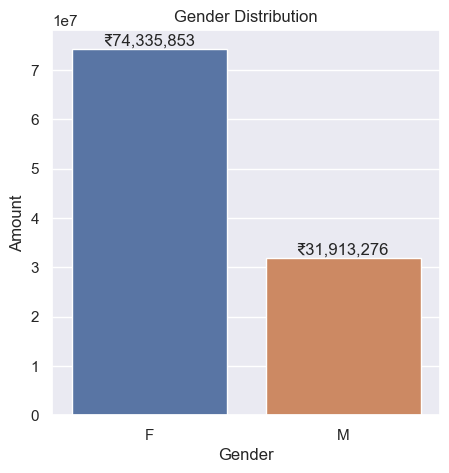

In [32]:
sales_gen=df.groupby (['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

barplot=sns.barplot(x='Gender',y='Amount',hue='Gender' ,data=sales_gen)
for bars in barplot.containers:
    barplot.bar_label(bars, fmt='₹{:,.0f}')

#sns.set(rc={'figure.figsize':(5,5)})
plt.title('Gender Distribution')

<h4 style="color : pink">From above graphs we can see the most of the buyers are females and even the purchasing power of female are greater than men<h4> 

<h2 style = "color : red"> Age<h2>

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'States', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Marital'],
      dtype='object')

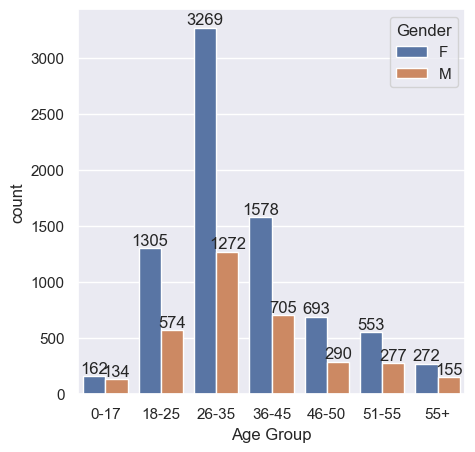

In [34]:
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50','51-55', '55+']
ax = sns.countplot (data=df,x = 'Age Group',hue='Gender', order=age_order)

for bars in ax.containers:
    ax.bar_label(bars)

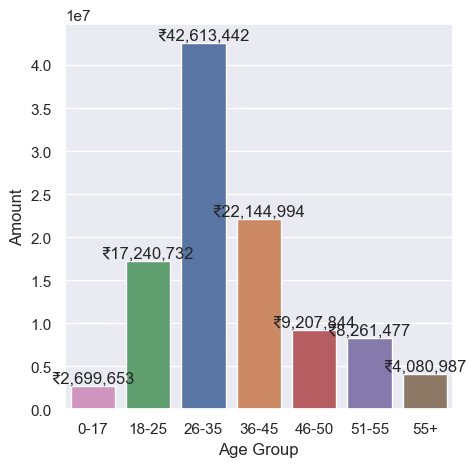

In [35]:
#Total amunt vs avg Group
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50','51-55', '55+']

sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by= 'Amount',ascending= False)
barplot=sns.barplot(x='Age Group', y= 'Amount',hue= 'Age Group' ,order=age_order,data=sales_age)
sns.set(rc={'figure.figsize':(12,5)})
for bars in barplot.containers:
    barplot.bar_label(bars, fmt='₹{:,.0f}')


<h4 stye= "color : pink">From above we can see that most of the buyers are between 26-35 yrs Age Group most of them female<h4>

<h2 style = "color : red"> states</h2>

In [36]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'States', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Marital'],
      dtype='object')

In [37]:
sales_state = df.groupby(['States'],as_index=False)['Orders'].sum().sort_values(by= 'Orders',ascending=False)
sales_state

,States,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


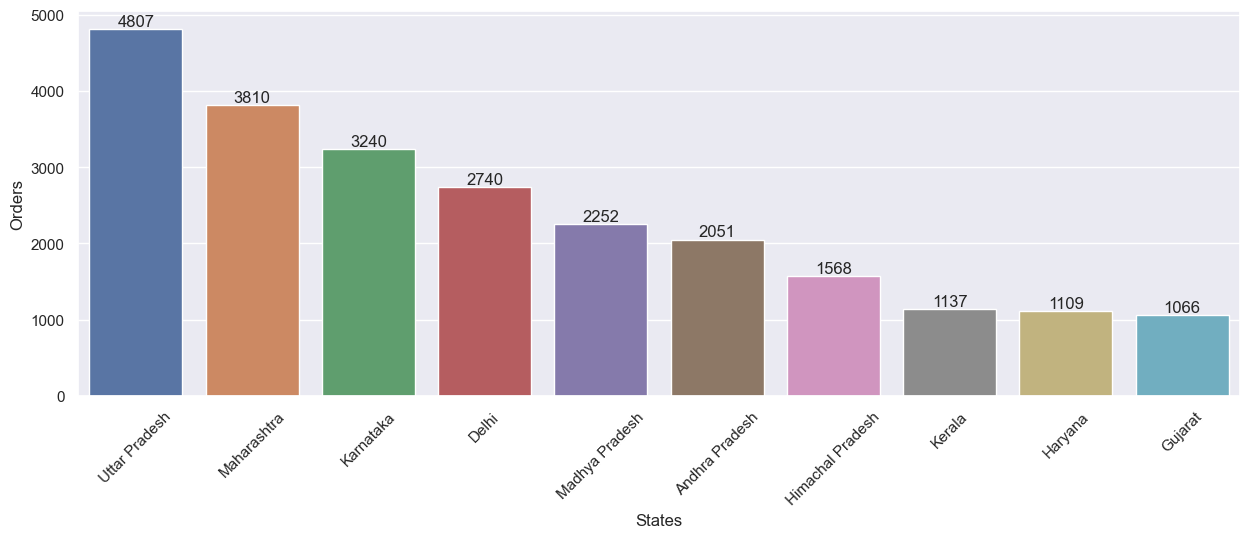

In [38]:
# total number of order form top 10 states 
sales_state = df.groupby(['States'],as_index=False)['Orders'].sum().sort_values(by= 'Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})# chart size
ax=sns.barplot(data=sales_state,x='States',y='Orders',hue='States')

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

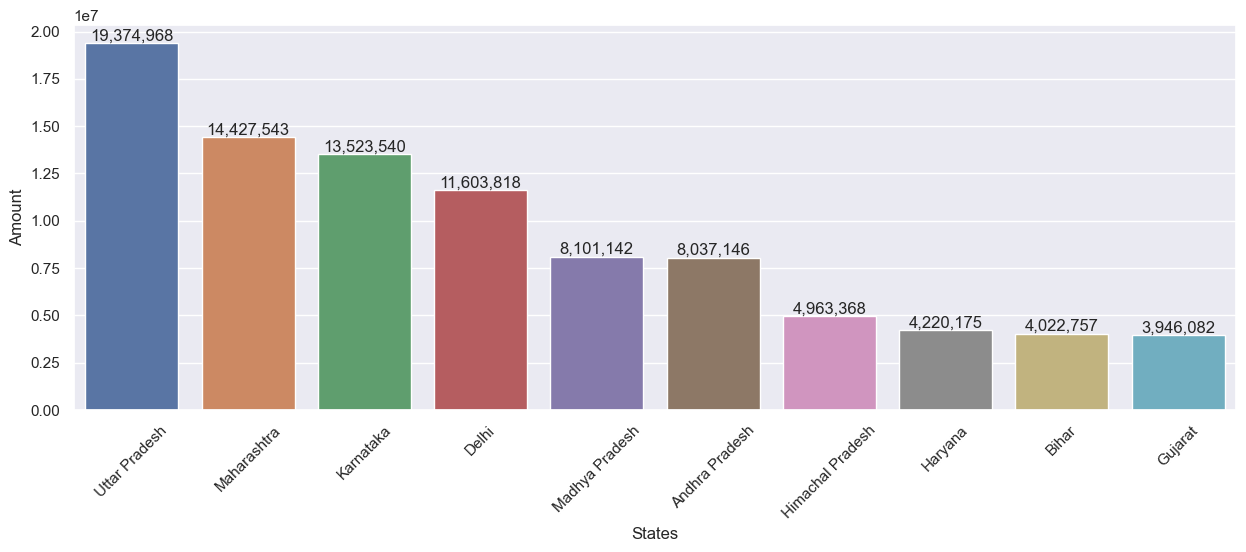

In [39]:
# total Amount/State form top 10 states 
sales_state = df.groupby(['States'],as_index=False)['Amount'].sum().sort_values(by= 'Amount',ascending=False).head(10)
#sns.set(rc={'figure.figsize':(15,7)})# chart size
ax=sns.barplot(data=sales_state,x='States',y='Amount',hue='States')

for bars in ax.containers:
    ax.bar_label(bars,fmt='{:,.0f}')
sns.set(rc={'figure.figsize':(15,4)})
plt.xticks(rotation=45)
plt.show()

<h4 style="color : pink">From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively</h4>

<h2 style="color:red">Marital Status</h2>

In [40]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'States', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Marital'],
      dtype='object')

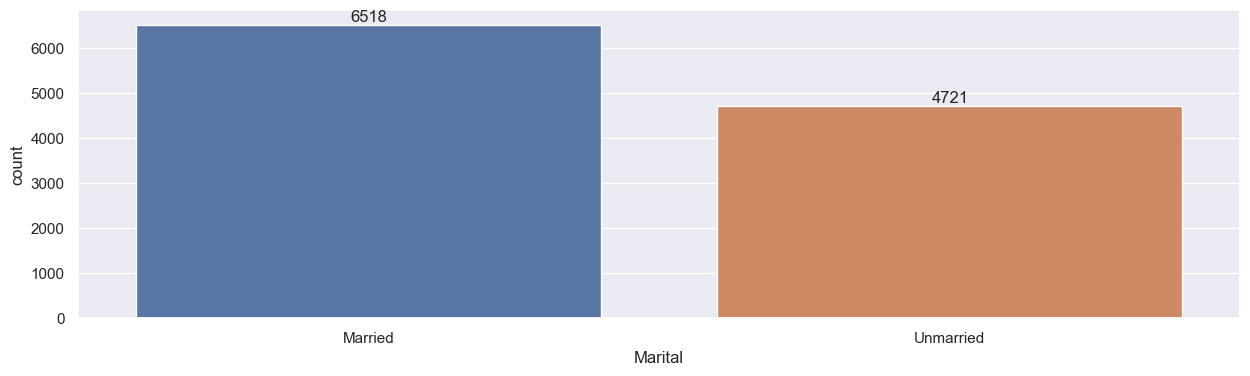

In [41]:
ax = sns.countplot(data= df, x='Marital',hue='Marital')

sns.set(rc={'figure.figsize':(4,5)})
for bars in ax.containers:
    ax.bar_label(bars)

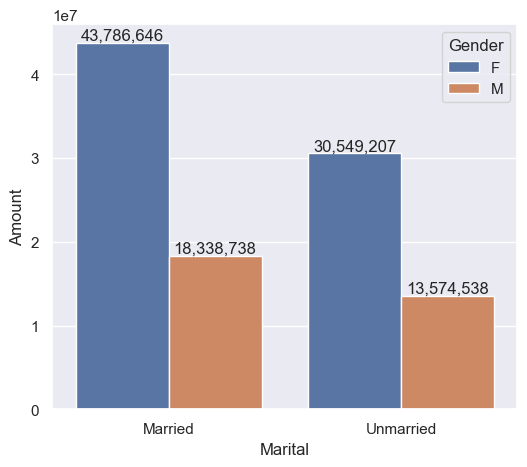

In [42]:
sales_state = df.groupby(['Marital','Gender'],as_index=False)['Amount'].sum().sort_values(by= 'Amount',ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
ax=sns.barplot(data= sales_state, x = 'Marital',y='Amount',hue= 'Gender')
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])
plt.show()

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

<h2 style="color:red">Occupation</h2>

In [43]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'States', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Marital'],
      dtype='object')

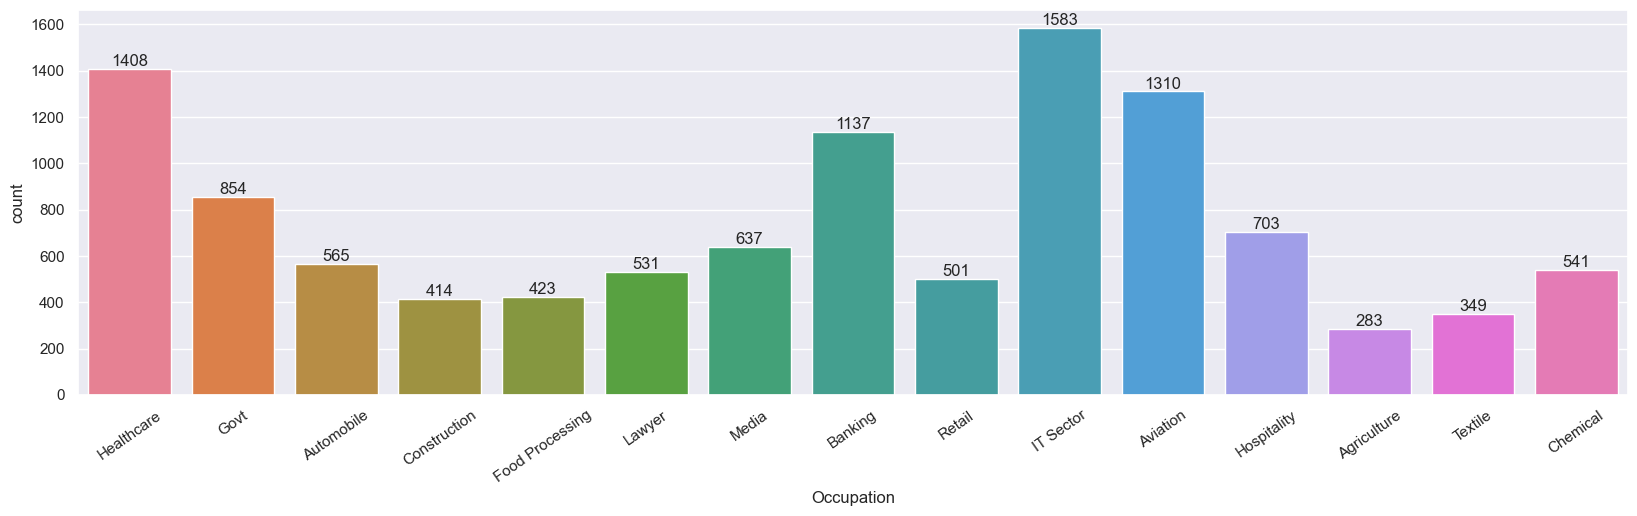

In [44]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data= df, x= 'Occupation', hue="Occupation")

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=35)
plt.show()

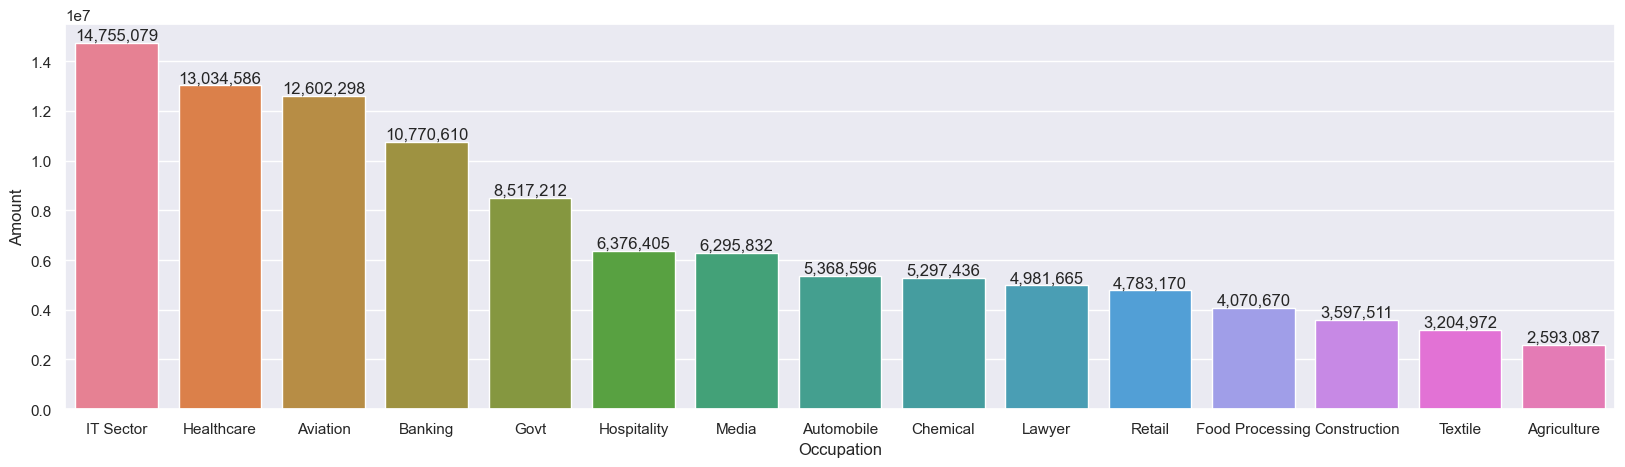

In [45]:
sales_state = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by= 'Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(data= sales_state, x = 'Occupation',y='Amount',hue= 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])
plt.show()

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector 

<h2 style="color:red">product Category</h2>

In [46]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'States', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Marital'],
      dtype='object')

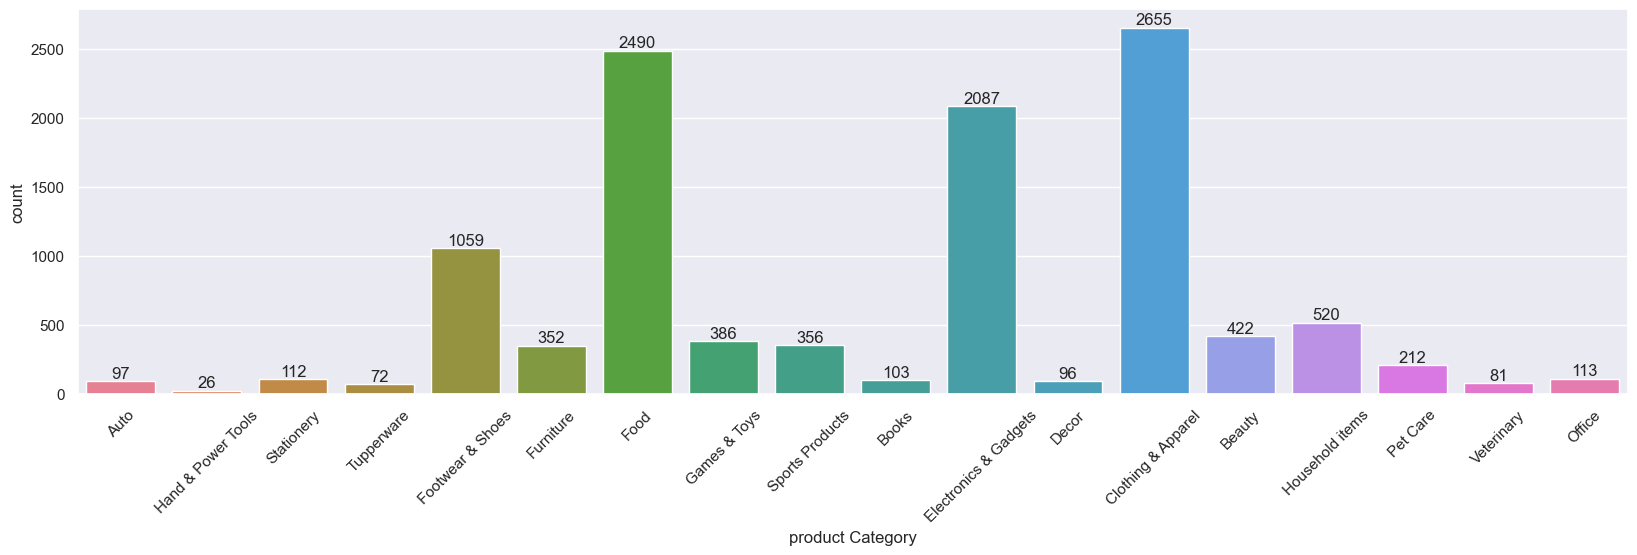

In [47]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data= df, x= 'Product_Category', hue="Product_Category")

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45)
plt.xlabel("product Category")
plt.show()

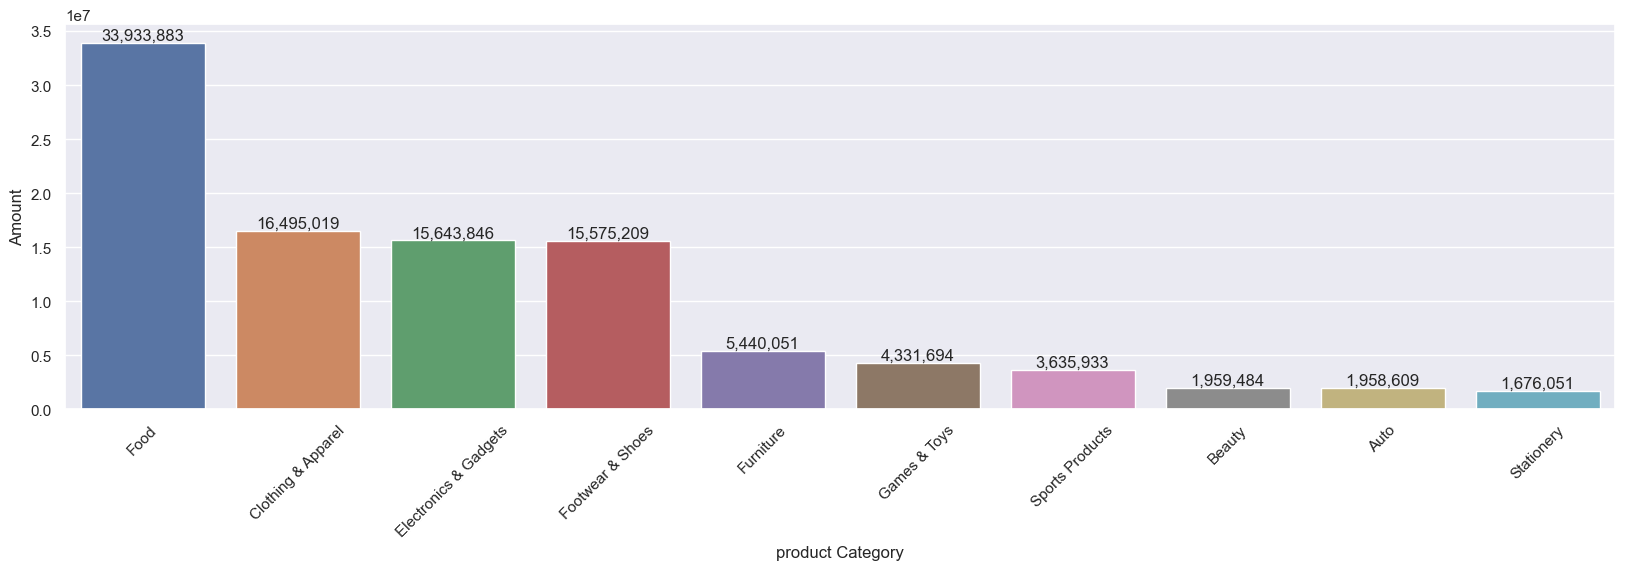

In [48]:
sales_state = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by= 'Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(data= sales_state, x = 'Product_Category',y='Amount',hue= 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])

plt.xlabel("product Category")
plt.xticks(rotation=45)
plt.show()

From the above Graph we can see that the which product ID got order how many time 

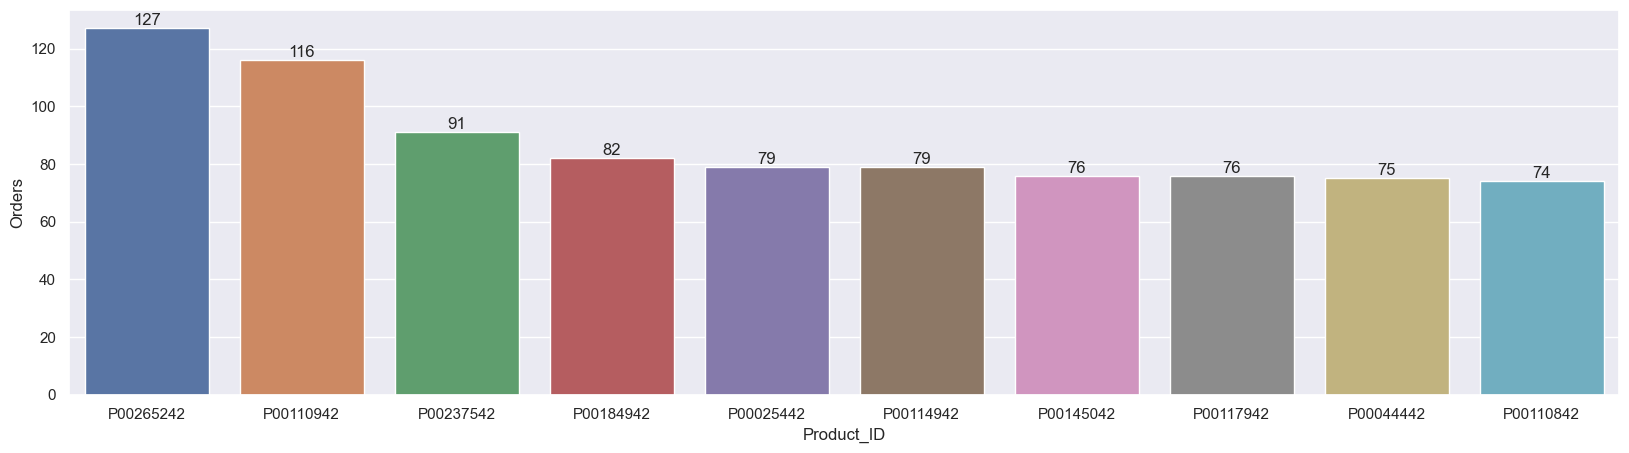

In [49]:
sales_state = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by= 'Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(data= sales_state, x = 'Product_ID',y='Orders',hue= 'Product_ID')
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])
plt.show()

<h2 style="color:red">Conclusion</h2>

Married women age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category